### K-means analysis_ver2 : 분석 연습ver1 의 k가 3개인 버전
- xlsx : cluster_summary_k_3

In [17]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
csv_path = "/home/miserver10/workspace_vscode/datasets/data/*.csv"

csv_files = glob.glob(csv_path)

df_list = [pd.read_csv(csv_file) for csv_file in csv_files]
df = pd.concat(df_list, ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339932 entries, 0 to 339931
Data columns (total 54 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Front_Seat_LH_Temp Unit: Degree ('c)     339932 non-null  float64
 1   Front_Seat_RH_Temp Unit: Degree('c)      339932 non-null  float64
 2   Rear_Seat_CT_Temp Unit: Degree('c)       339932 non-null  float64
 3   Front_Roof_CT_Temp Unit: Degree('c)      339932 non-null  float64
 4   Front_Roof_LH_Temp Unit: Degree('c)      339932 non-null  float64
 5   Front_Roof_RH_Temp Unit: Degree('c)      339932 non-null  float64
 6   Rear_Roof_LH_Temp Unit: Degree('c)       339932 non-null  float64
 7   Rear_Roof_RH_Temp Unit: Degree('c)       339932 non-null  float64
 8   DRV_LH_Vent_Wind_Velocity Unit: m / s    339932 non-null  float64
 9   DRV_RH_Vent_Wind_Velocity Unit: m / s    339932 non-null  float64
 10  DRV_Foot_Vent_Wind_Velocity Unit

In [19]:
drop_list = ["Front_Seat_LH_Temp Unit: Degree ('c)",
       "Front_Seat_RH_Temp Unit: Degree('c)",
       "Rear_Seat_CT_Temp Unit: Degree('c)",
       "Front_Roof_CT_Temp Unit: Degree('c)",
       "Front_Roof_LH_Temp Unit: Degree('c)",
       "Front_Roof_RH_Temp Unit: Degree('c)",
       "Rear_Roof_LH_Temp Unit: Degree('c)",
       "Rear_Roof_RH_Temp Unit: Degree('c)",
       "DRV_LH_Vent_Wind_Velocity Unit: m / s",
       "DRV_RH_Vent_Wind_Velocity Unit: m / s",
       "DRV_Foot_Vent_Wind_Velocity Unit: m / s",
       "DRV_Seat_Vent_Wind_Velocity Unit: m / s",
       "PAS_LH_Vent_Wind_Velocity Unit: m / s",
       "PAS_RH_Vent_Wind_Velocity Unit: m / s",
       "PAS_Foot_Vent_Wind_Velocity Unit: m / s",
       "PAS_Seat_Vent_Wind_Velocity Unit: m / s", "5V_ADC_CH1 Unit: V",
       "5V_ADC_CH2 Unit: V", "5V_ADC_CH3 Unit: V", "5V_ADC_CH4 Unit: V",
       "5V_ADC_CH5 Unit: V", "PWM_CH8 Unit: PWM", "Frequency_CH8 Unit: Hz",
       "CR_Datc_DrModeAct","CR_Datc_TempAct", "CR_Datc_IntakeAct", "CR_Datc_AdsAct",
       "CR_Datc_DrVentTemp_C", "CR_Datc_DrFloorTemp_C", 
       "CR_Datc_ClimatePowSum_W", "LAT_ACCEL_m/s^2", "LONG_ACCEL_m/s^2",
       "YAW_RATE_'/s", "WHL_SPD_FL_km/h", "WHL_SPD_FR_km/h", "WHL_SPD_RL_km/h",
       "WHL_SPD_RR_km/h", 'CR_Datc_AcnCompSpdFB_rpm', 'CR_Datc_AptVal_PSI', 'CR_Datc_OutTemp_C', 
       'CR_Datc_OutTempC' ,'CR_Datc_EvapSnsTemp_C', 'CR_Datc_DrTempDispC', 'DATC_ModeDisp']

df = df.drop(drop_list, axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339932 entries, 0 to 339931
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CR_Datc_AcnCompPwrCon_W  339932 non-null  int64  
 1   CR_Datc_OutTempSnr_C     339932 non-null  float64
 2   CR_Datc_PTCPwrCon_W      339932 non-null  int64  
 3   CF_Datc_Heatpump_Mode    339932 non-null  int64  
 4   CR_Datc_SetTemp_C        339932 non-null  float64
 5   CR_Datc_IncarSnsTemp_C   339932 non-null  float64
 6   DATC_BlowerLevel         339932 non-null  int64  
 7   CR_Datc_PhotoSnsFB_V     339932 non-null  float64
 8   CR_Datc_Humidity         339932 non-null  float64
 9   CR_Mcu_VehSpd_Kph_sum    339932 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 25.9 MB


In [21]:
df.rename(columns={'CR_Datc_OutTempSnr_C': '외부 온도', 'CR_Datc_AcnCompPwrCon_W': '에어컨 압축기 전력 소비량',
                   'CR_Datc_PTCPwrCon_W': '히터의 전력 소비량', 'DATC_BlowerLevel': '바람세기', 'CF_Datc_Heatpump_Mode' : '히트 펌프',
                   'CR_Datc_SetTemp_C': '설정 온도', 'CR_Datc_IncarSnsTemp_C': '내부 온도', 
                   'CR_Datc_PhotoSnsFB_V' : '일사량', 'CR_Datc_Humidity' : '습도', 'CR_Mcu_VehSpd_Kph_sum' : '차량 속도'}, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339932 entries, 0 to 339931
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   에어컨 압축기 전력 소비량  339932 non-null  int64  
 1   외부 온도           339932 non-null  float64
 2   히터의 전력 소비량      339932 non-null  int64  
 3   히트 펌프           339932 non-null  int64  
 4   설정 온도           339932 non-null  float64
 5   내부 온도           339932 non-null  float64
 6   바람세기            339932 non-null  int64  
 7   일사량             339932 non-null  float64
 8   습도              339932 non-null  float64
 9   차량 속도           339932 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 25.9 MB


In [23]:
df = df[(df['외부 온도'] >= 21) & (df['외부 온도'] <= 24)]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45617 entries, 0 to 324775
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   에어컨 압축기 전력 소비량  45617 non-null  int64  
 1   외부 온도           45617 non-null  float64
 2   히터의 전력 소비량      45617 non-null  int64  
 3   히트 펌프           45617 non-null  int64  
 4   설정 온도           45617 non-null  float64
 5   내부 온도           45617 non-null  float64
 6   바람세기            45617 non-null  int64  
 7   일사량             45617 non-null  float64
 8   습도              45617 non-null  float64
 9   차량 속도           45617 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.8 MB


In [25]:
X=df

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_

/home/miserver10/workspace_vscode/K-means/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/tmp/ipykernel_33989/4085950232.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=300, c='red', edgecolors='k', label='Centroids')


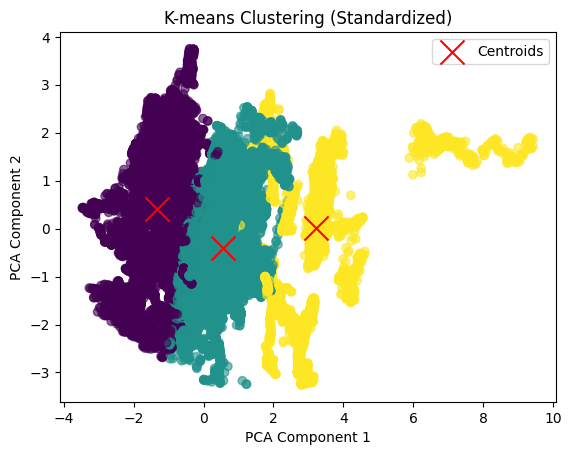

In [30]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=300, c='red', edgecolors='k', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (Standardized)')
plt.legend()
plt.show()

In [31]:
df['Cluster'] = labels 

cluster_summary_original_scale = df.groupby('Cluster').mean()
print("\nCluster Summary on Original Scale (Mean Values):")
print(cluster_summary_original_scale)


Cluster Summary on Original Scale (Mean Values):
         에어컨 압축기 전력 소비량      외부 온도  히터의 전력 소비량     히트 펌프      설정 온도  \
Cluster                                                               
0            344.466889  22.906388    0.000000  0.001095  19.033360   
1            189.562992  22.037109    0.000000  0.009271  21.432372   
2              0.000000  22.161780  100.422125  5.824912  20.985756   

             내부 온도      바람세기       일사량         습도      차량 속도  
Cluster                                                       
0        21.863053  3.575800  0.297774  40.715160  58.517242  
1        24.350017  3.401275  0.267123  42.683012  56.855407  
2        25.604907  3.560616  0.512793  45.565086  56.081182  


In [32]:
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary on Original Scale (Mean Values):")
print(cluster_summary)

# 결과를 엑셀 파일로 저장합니다
output_file = 'cluster_summary_k_3.xlsx'
cluster_summary.to_excel(output_file, index=True)

print(f"\nCluster summary has been saved to {output_file}")


Cluster Summary on Original Scale (Mean Values):
         에어컨 압축기 전력 소비량      외부 온도  히터의 전력 소비량     히트 펌프      설정 온도  \
Cluster                                                               
0            344.466889  22.906388    0.000000  0.001095  19.033360   
1            189.562992  22.037109    0.000000  0.009271  21.432372   
2              0.000000  22.161780  100.422125  5.824912  20.985756   

             내부 온도      바람세기       일사량         습도      차량 속도  
Cluster                                                       
0        21.863053  3.575800  0.297774  40.715160  58.517242  
1        24.350017  3.401275  0.267123  42.683012  56.855407  
2        25.604907  3.560616  0.512793  45.565086  56.081182  

Cluster summary has been saved to cluster_summary_k_3.xlsx
